In [ ]:
from sklearn import svm,neighbors,naive_bayes,discriminant_analysis,neural_network,metrics,tree
from sklearn.model_selection import KFold,cross_val_score,RepeatedStratifiedKFold
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import sem
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector,RFE,RFECV,SelectKBest, f_classif
import os

In [ ]:
# read csv from github
git_link = "https://raw.githubusercontent.com/Hangyu14/Anxiety-Detection/main/twoleveldata_hrvrrv.csv?token=GHSAT0AAAAAABWNHQ6RSAPB2D74XI4DU3NGYYEUYJQ"
alldata_2 = pd.read_csv(git_link)
# print(alldata_2)
alldata_2 = alldata_2.iloc[:, 1:44]
feature = list(alldata_2.columns)
hrv_feature = list(alldata_2.iloc[:, 0:24].columns)
rrv_feature = list(alldata_2.iloc[:, 24:42].columns)
print(feature)
print(hrv_feature)
print(rrv_feature)
print(alldata_2.shape)

['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1', 'label']
['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2']
['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV

In [ ]:
hrv_data = alldata_2[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2','label']]
rrv_data = alldata_2[['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1','label']]
# hrvrrv_data = alldata_2[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD',  'HRV_MedianNN','HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2','RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_MedianBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1','label']]
print(hrv_data.columns)
print(hrv_data.shape)
print(rrv_data.columns)
print(rrv_data.shape)
# print(hrvrrv_data.columns)
# print(hrvrrv_data.shape)
print(hrv_data.iloc[:,:-1])

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF',
       'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1',
       'HRV_SD2', 'HRV_SD1SD2', 'label'],
      dtype='object')
(38138, 25)
Index(['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB',
       'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF',
       'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1',
       'RRV_SD2', 'RRV_SD2SD1', 'label'],
      dtype='object')
(38138, 19)
       HRV_MeanNN   HRV_SDNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  HRV_CVSD  \
0      748.379747  36.762684  24.306800  24.406549  0.049123  0.032479   
1      749.435897  38.290615  25.070291  25.196616  0.051093  0.033452   
2      750.641026  39.140763  25.056819  25.181583  0.052143  0.033381   
3      752.278481  39.425014  24.916270  25

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

hrv_data_norm = normalize(hrv_data)
rrv_data_norm = normalize(rrv_data)

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = KFold(n_splits=10,shuffle=True)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores



In [ ]:
classfier_svm = svm.SVC(C=1000)
classfier_knn = neighbors.KNeighborsClassifier(p=1,n_neighbors=55)
classfier_mlp = neural_network.MLPClassifier()


def ftest(inputdata,model):
  # define dataset
  X = inputdata.iloc[:,:-1]
  y = inputdata['label']
  # define number of features to evaluate
  num_features = [i+1 for i in range(X.shape[1])]
  # enumerate each number of features
  results = list()
  for k in num_features:
    # create pipeline
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('model', model)])
    # evaluate the model
    scores = evaluate_model(pipeline, X, y) 
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

  # plot model performance for comparison
  pyplot.rcParams['figure.figsize']=(16,9)
  pyplot.boxplot(results, labels=num_features, showmeans=True)
  pyplot.xlabel('Number of selected Features')
  pyplot.ylabel('Accuracy')
  pyplot.show()

  return scores






>1 0.691 (0.009)
>2 0.705 (0.007)
>3 0.731 (0.004)
>4 0.750 (0.021)
>5 0.753 (0.020)
>6 0.793 (0.013)
>7 0.808 (0.010)
>8 0.814 (0.004)
>9 0.820 (0.006)
>10 0.838 (0.003)
>11 0.839 (0.005)
>12 0.845 (0.006)
>13 0.849 (0.003)
>14 0.851 (0.005)
>15 0.861 (0.010)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>16 0.867 (0.006)
>17 0.878 (0.004)
>18 0.878 (0.007)
>19 0.884 (0.002)
>20 0.888 (0.004)
>21 0.883 (0.005)
>22 0.886 (0.010)
>23 0.887 (0.013)
>24 0.891 (0.004)


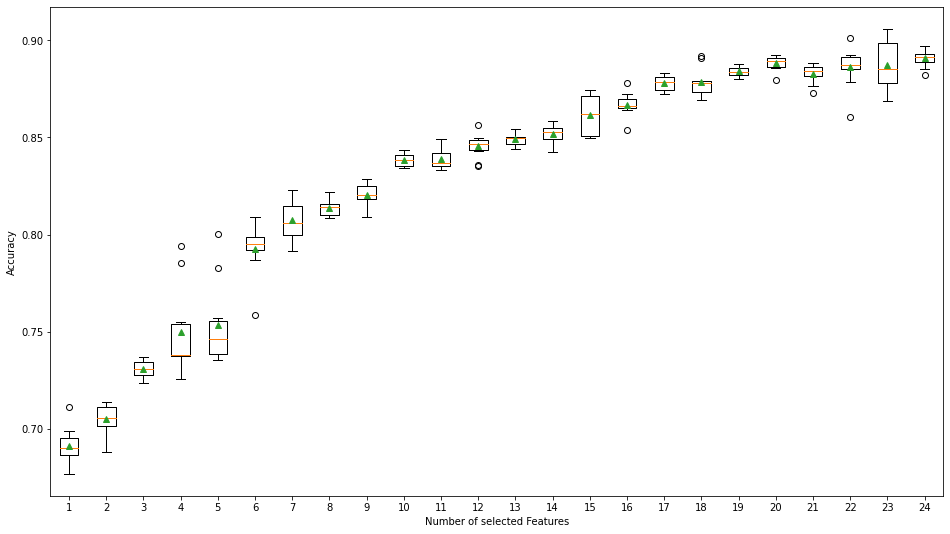

>1 0.683 (0.005)
>2 0.699 (0.005)
>3 0.718 (0.004)
>4 0.769 (0.005)
>5 0.778 (0.006)
>6 0.790 (0.009)
>7 0.799 (0.006)
>8 0.807 (0.004)
>9 0.807 (0.005)
>10 0.811 (0.006)
>11 0.817 (0.006)
>12 0.819 (0.008)
>13 0.822 (0.006)
>14 0.822 (0.007)
>15 0.820 (0.006)
>16 0.816 (0.005)
>17 0.821 (0.007)
>18 0.825 (0.004)


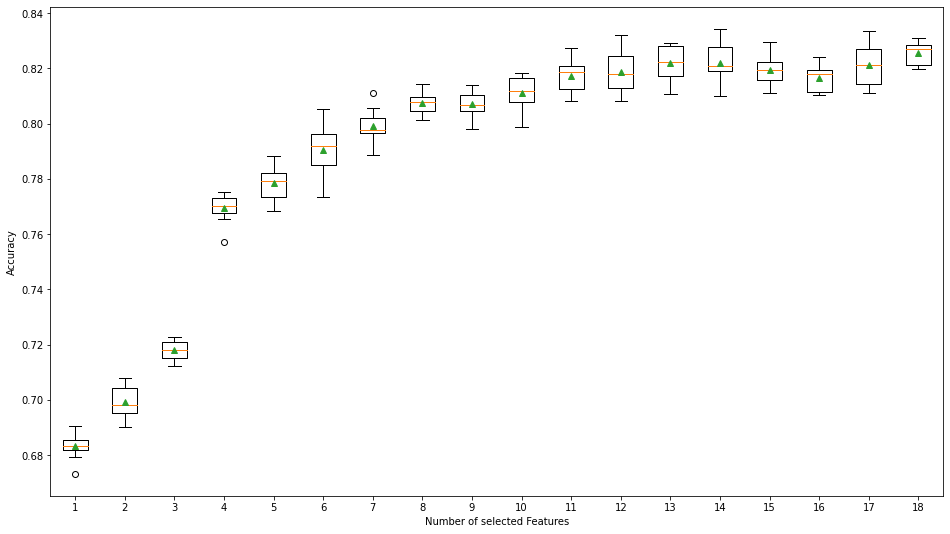

KeyboardInterrupt: ignored

In [ ]:
knn_s = ftest(hrv_data_norm,classfier_knn)
knn_s1 = ftest(rrv_data_norm,classfier_knn)
svm_s1 = ftest(rrv_data_norm,classfier_svm)
svm_s = ftest(hrv_data_norm,classfier_svm)
mlp_s1 = ftest(rrv_data_norm,classfier_mlp)
mlp_s = ftest(hrv_data_norm,classfier_mlp)

>1 0.686 (0.008)
>2 0.687 (0.011)
>3 0.690 (0.007)
>4 0.699 (0.010)
>5 0.702 (0.006)
>6 0.711 (0.010)
>7 0.715 (0.007)
>8 0.715 (0.007)
>9 0.717 (0.009)
>10 0.725 (0.013)
>11 0.727 (0.007)
>12 0.729 (0.010)
>13 0.733 (0.009)
>14 0.731 (0.006)
>15 0.731 (0.008)
>16 0.734 (0.008)
>17 0.738 (0.006)
>18 0.744 (0.007)


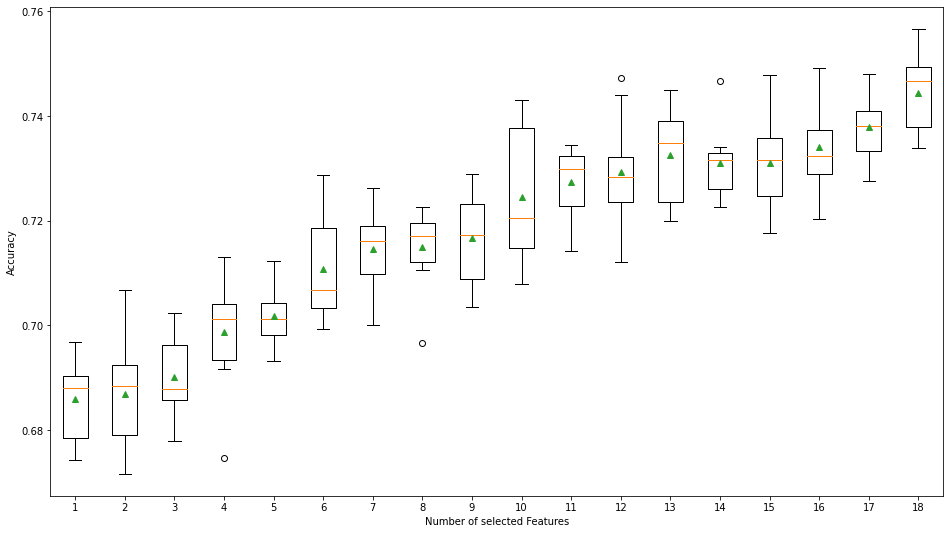

>1 0.691 (0.008)
>2 0.695 (0.011)
>3 0.694 (0.007)
>4 0.700 (0.011)
>5 0.703 (0.003)
>6 0.708 (0.007)
>7 0.715 (0.007)
>8 0.717 (0.009)
>9 0.720 (0.009)
>10 0.729 (0.007)
>11 0.731 (0.012)
>12 0.732 (0.010)
>13 0.739 (0.007)
>14 0.738 (0.009)
>15 0.747 (0.010)
>16 0.754 (0.007)
>17 0.762 (0.008)
>18 0.764 (0.011)
>19 0.764 (0.006)
>20 0.772 (0.009)
>21 0.779 (0.009)
>22 0.781 (0.009)
>23 0.792 (0.011)
>24 0.801 (0.010)


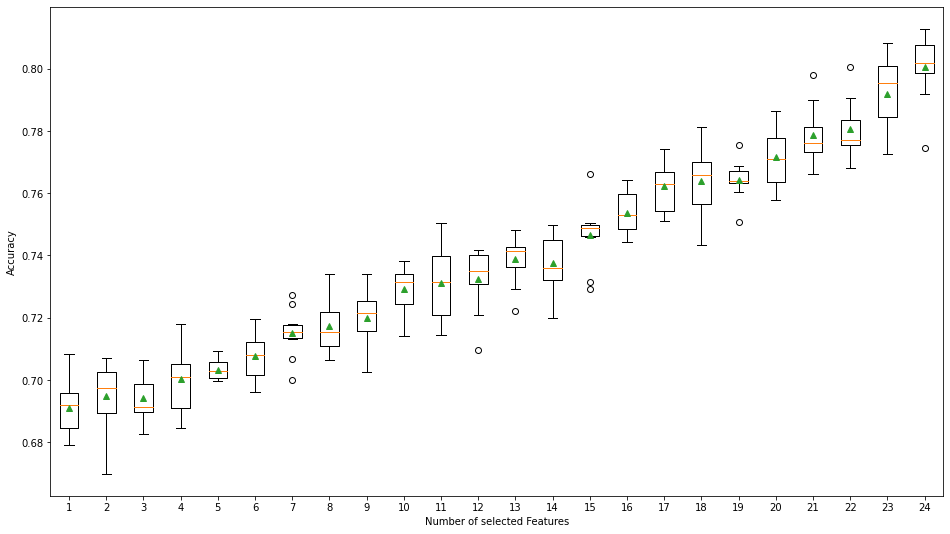

In [ ]:
mlp_s1 = ftest(rrv_data_norm,classfier_mlp)
mlp_s = ftest(hrv_data_norm,classfier_mlp)

In [ ]:
X = hrv_data_norm.iloc[:,:-1]
y = hrv_data_norm['label']
fs = SelectKBest(score_func=f_classif, k=20).fit(X,y)
mask = fs.get_support()
new_features = X.columns[mask]
print(new_features)

['HRV_MeanNN' 'HRV_SDNN' 'HRV_RMSSD' 'HRV_SDSD' 'HRV_CVNN' 'HRV_CVSD'
 'HRV_MedianNN' 'HRV_MadNN' 'HRV_MCVNN' 'HRV_IQRNN' 'HRV_pNN50'
 'HRV_pNN20' 'HRV_HTI' 'HRV_TINN' 'HRV_LF' 'HRV_HF' 'HRV_VHF' 'HRV_LFHF'
 'HRV_LFn' 'HRV_HFn' 'HRV_LnHF' 'HRV_SD1' 'HRV_SD2' 'HRV_SD1SD2']
